In [ ]:
# Author: Davidson Siga 
# ID: dsiga
# Some code inspired from Davidson's DSPM class

# All used libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="ticks", color_codes=True)
import re  

import nltk 
nltk.download('stopwords')  
from nltk.corpus import stopwords 
nltk.download('punkt')
nltk.download('wordnet')

import spacy
nlp = spacy.load('en_core_web_sm')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
ls

drive/  sample_data/  twitterdata.csv


In [ ]:
# Importing the data

path=r'twitterdata.csv'

# Please change the path before running
OG_Data = pd.read_csv(path, encoding='latin1')
# Not sure how to provide relative path, will be great if it could be shared.

OG_Data.head(10)

,author id,created_at,geo,id,lang,like_count,quote_count,reply_count,retweet_count,source,tweet
0,976439867109384192,2021-05-30 23:59:55+00:00,,1399153632684036097,in,0,0,0,11613,Twitter for Android,RT @khairulaming: Thread bisnes makanan untuk ...
1,17350295,2021-05-30 23:59:51+00:00,,1399153617110663168,en,0,0,0,0,Twitter Web App,@craigtimes @GovRonDeSantis @KnowlesHannah Rep...
2,1141245118340427776,2021-05-30 23:59:34+00:00,,1399153545400573957,in,0,0,0,11613,Twitter for Android,RT @khairulaming: Thread bisnes makanan untuk ...
3,1026467136800153600,2021-05-30 23:59:29+00:00,,1399153524064198657,en,0,0,0,1587,Twitter for iPhone,RT @leftyaiman: If full lock down is inevitabl...
4,1286911230435786754,2021-05-30 23:59:24+00:00,,1399153503512236035,en,16,0,3,0,Twitter for iPhone,lord you guys I just got this ice cream from t...
5,121568833,2021-05-30 23:59:24+00:00,,1399153501096366084,en,0,0,0,19,TweetDeck,RT @danfallak: @CFIB We need a third round of ...
6,1269540563377778689,2021-05-30 23:59:23+00:00,,1399153496759230465,in,0,0,0,11613,Twitter for Android,RT @khairulaming: Thread bisnes makanan untuk ...
7,335473635,2021-05-30 23:58:55+00:00,,1399153380832907264,in,0,0,0,11613,Twitter for Android,RT @khairulaming: Thread bisnes makanan untuk ...
8,995754156689362945,2021-05-30 23:58:02+00:00,,1399153159105355777,en,3,0,4,1,Twitter for iPhone,Iâve been doing some research on âAfrican ...
9,536068379,2021-05-30 23:57:54+00:00,,1399153123931787264,en,0,0,0,4,Twitter for iPad,"RT @ronInBendigo: Hey @Origsmartassam, you the..."


In [ ]:
# Working with the Text
Data_to_Analyse.info()
# No missing


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4360 entries, 0 to 4359
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   author id      4360 non-null   int64 
 1   created_at     4360 non-null   object
 2   geo            4360 non-null   object
 3   id             4360 non-null   int64 
 4   lang           4360 non-null   object
 5   like_count     4360 non-null   int64 
 6   quote_count    4360 non-null   int64 
 7   reply_count    4360 non-null   int64 
 8   retweet_count  4360 non-null   int64 
 9   source         4360 non-null   object
 10  tweet          4360 non-null   object
dtypes: int64(6), object(5)
memory usage: 374.8+ KB


In [ ]:
X = OG_Data[['tweet','id']]
mytext=X['tweet']
X.head()

,tweet,id
0,RT @khairulaming: Thread bisnes makanan untuk ...,1399153632684036097
1,@craigtimes @GovRonDeSantis @KnowlesHannah Rep...,1399153617110663168
2,RT @khairulaming: Thread bisnes makanan untuk ...,1399153545400573957
3,RT @leftyaiman: If full lock down is inevitabl...,1399153524064198657
4,lord you guys I just got this ice cream from t...,1399153503512236035


Basic Cleaning on tweets

In [ ]:
# ref : https://medium.com/analytics-vidhya/sentiment-analysis-on-amazon-reviews-using-tf-idf-approach-c5ab4c36e7a1

# Code to remove contractions

def contractions(s):
  s = re.sub(r"won’t", "will not",s)
  s = re.sub(r"would’t", "would not",s)
  s = re.sub(r"could’t", "could not",s)
  s = re.sub(r"\’d", " would",s)
  s = re.sub(r"can\’t", "can not",s)
  s = re.sub(r"n\’t", " not", s)
  s = re.sub(r"\’re", " are", s)
  s = re.sub(r"\’s", " is", s)
  s = re.sub(r"\’ll", " will", s)
  s = re.sub(r"\’t", " not", s)
  s = re.sub(r"\’ve", " have", s)
  s = re.sub(r"\’m", " am", s)
  return s

In [ ]:
# Code to clean the data better, this is not yet very twitter specific

processed_texts = []
# ref : https://python.gotrained.com/tf-idf-twitter-sentiment-analysis/

#  Cleaning the text data
for text in range(0, len(X)):  
    # print(X[text])

    # Perform the Contractions on the text

    processed_text = contractions(str(mytext[text]))

    # Remove all the special characters
    # Keep hashtags RECHECK, keep in sep column
    # processed_text = re.sub(r'\W', ' ', processed_text)
 
    # remove all single characters
    processed_text = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_text)
 
    # Remove single characters from the start
    processed_text = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_text) 
 
    # Substituting multiple spaces with single space
    processed_text= re.sub(r'\s+', ' ', processed_text, flags=re.I)
 
    # Removing prefixed 'b'
    processed_text = re.sub(r'^b\s+', '', processed_text)
 
    # Converting to Lowercase
    processed_text = processed_text.lower()


    # TWITTER SPECIFIC CLEANING : ref : https://catriscode.com/2021/05/01/tweets-cleaning-with-python/
    # Removing links
    temp = re.sub(r"http\S+", "", processed_text)
    temp = re.sub(r"www.\S+", "", temp)

    # Removing punctuations
    temp = re.sub('[()!?]', ' ', temp)
    temp = re.sub('\[.*?\]',' ', temp)

    # Filtering non-alphanumeric characters
    temp = re.sub("[^a-z0-9]"," ", temp)

    processed_text=temp

 
    processed_texts.append(processed_text)

In [ ]:
data=pd.DataFrame()
data['pre_process']=processed_texts
data['id']=X['id']
data.head(20)

,pre_process,id
0,rt khairulaming thread bisnes makanan untuk kl...,1399153632684036097
1,craigtimes govrondesantis knowleshannah repub...,1399153617110663168
2,rt khairulaming thread bisnes makanan untuk kl...,1399153545400573957
3,rt leftyaiman if full lock down is inevitable ...,1399153524064198657
4,lord you guys just got this ice cream from thi...,1399153503512236035
5,rt danfallak cfib we need third round of the o...,1399153501096366084
6,rt khairulaming thread bisnes makanan untuk kl...,1399153496759230465
7,rt khairulaming thread bisnes makanan untuk kl...,1399153380832907264
8,i ve been doing some research on african bl...,1399153159105355777
9,rt roninbendigo hey origsmartassam you there 3...,1399153123931787264


Lemmatizations

In [ ]:
# Lemmatization after processing of text
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
data['pre_process']=data['pre_process'].apply(lambda x: " ".join([lemmatizer.lemmatize(w) for w in nltk.word_tokenize(x)]))

In [ ]:
data.head(20)

,pre_process,id
0,rt khairulaming thread bisnes makanan untuk kl...,1399153632684036097
1,craigtimes govrondesantis knowleshannah republ...,1399153617110663168
2,rt khairulaming thread bisnes makanan untuk kl...,1399153545400573957
3,rt leftyaiman if full lock down is inevitable ...,1399153524064198657
4,lord you guy just got this ice cream from this...,1399153503512236035
5,rt danfallak cfib we need third round of the o...,1399153501096366084
6,rt khairulaming thread bisnes makanan untuk kl...,1399153496759230465
7,rt khairulaming thread bisnes makanan untuk kl...,1399153380832907264
8,i ve been doing some research on african black...,1399153159105355777
9,rt roninbendigo hey origsmartassam you there 3...,1399153123931787264


In [ ]:
!pip install yellowbrick

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

from yellowbrick.text import FreqDistVisualizer
from yellowbrick.datasets import load_hobbies


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


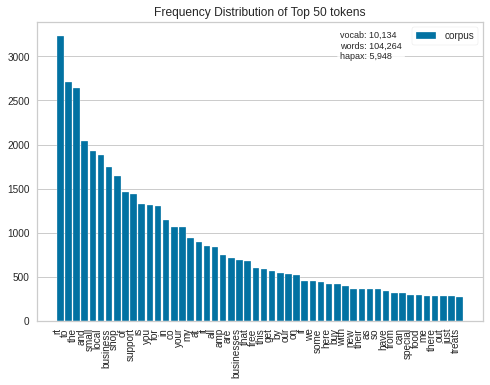

In [ ]:
# VISUALIZING THE TOP WORDS

# Load the text data
vectorizer = CountVectorizer()
docs       = vectorizer.fit_transform(processed_texts)
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(docs)
visualizer.show()

# SO MANY STOP WORDS :), remove.

In [ ]:
get_nlp_out=nlp(','.join(processed_texts))

In [ ]:
# create counts of POS occurrences (adjectives, nouns, verbs,punct)
# CLASS SLIDES
adjs,nouns,verbs=[],[],[]

for token in get_nlp_out:
  if token.text in nlp.Defaults.stop_words: # remove stop words
    continue
  if token.pos_ == 'ADJ':
    adjs.append(token.text)
  elif token.pos_ == 'NOUN':
    nouns.append(token.text)
  elif token.pos_ == 'VERB':
    verbs.append(token.text)


In [ ]:
# ANALYZING FOR PUNCTUATION ON DATA BEFORE CLEANING

from nltk.tokenize import WordPunctTokenizer
punct_tokenizer = WordPunctTokenizer()
punct_tokens = []

for sent in OG_Data['tweet']:
    punct_tokens.append(punct_tokenizer.tokenize(sent))

puncts=[]

flat_list = [item for sublist in punct_tokens for item in sublist]
for token in flat_list:
  if re.match('[^A-Za-z0-9]', token ):
    puncts.append(token)


In [ ]:
# Looking at the punctuations
# The comma and lot of spaces are mostly the most used

from collections import Counter 
top_puncs = Counter(puncts).most_common(20)
top_puncs

# We get .|/|@|: as the top punctuations

[('@', 4700),
 ('.', 4001),
 (':', 3506),
 ('\x80¦', 2948),
 (',', 2244),
 ('ð', 1877),
 ('â', 1293),
 ('#', 1279),
 ('/', 1244),
 ('!', 1220),
 ("'", 1215),
 ('://', 1053),
 (';', 1004),
 ('-', 828),
 ('&', 774),
 ('\x80\x99', 692),
 ('?', 428),
 ('\x9f\x91\x87', 313),
 ('$', 286),
 ('\x9e¡', 273)]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


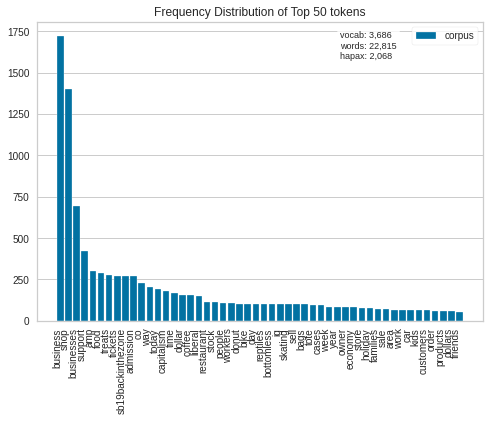

In [ ]:
# VISUALIZING THE TOP NOUN WORDS

# Load the text data
vectorizer = CountVectorizer()
docs       = vectorizer.fit_transform(nouns)
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(docs)
visualizer.show()

# below are the top 50 words, we should remove the top few words from our corpus
# self|car|cars|oo|diving|http|driverless|future|vehicle

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


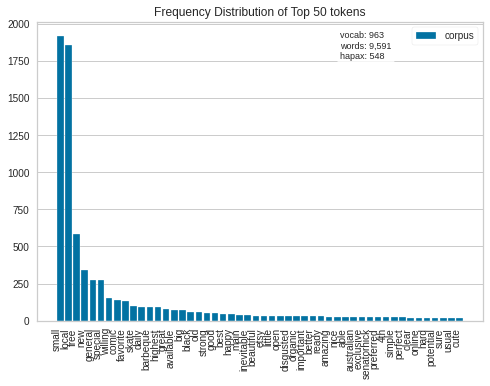

In [ ]:
# VISUALIZING THE TOP ADJ WORDS

# Load the text data
vectorizer = CountVectorizer()
docs       = vectorizer.fit_transform(adjs)
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(docs)
visualizer.show()

# below are the top 50 ADJECTIVE words, we should remove the top few words from our corpus

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


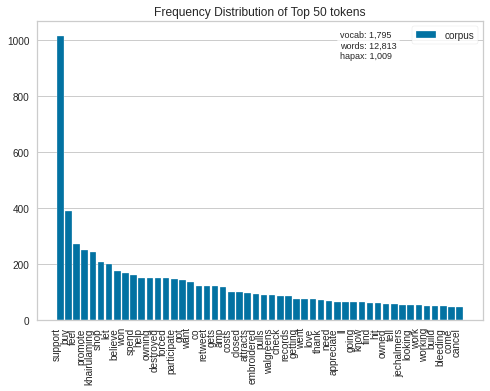

In [ ]:
# VISUALIZING THE TOP VERBS WORDS

# Load the text data
vectorizer = CountVectorizer()
docs       = vectorizer.fit_transform(verbs)
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(docs)
visualizer.show()

# below are the top 50 VERBS words, we should remove the top few words from our corpus

In [ ]:
# Stopwords and top wrds removed
# Import stopwords with nltk.
from nltk.corpus import stopwords
stop = stopwords.words('english')
frequent_words='co|rt'.split('|')
# Removing most freq words from our data
data['pre_process_new'] = data['pre_process'].apply(lambda x: ' '.join([word for word in x.split() if (word not in stop + frequent_words)]))
data

# from now we will use pre_process_new

,pre_process,id,pre_process_new
0,rt khairulaming thread bisnes makanan untuk kl...,1399153632684036097,khairulaming thread bisnes makanan untuk kl da...
1,craigtimes govrondesantis knowleshannah republ...,1399153617110663168,craigtimes govrondesantis knowleshannah republ...
2,rt khairulaming thread bisnes makanan untuk kl...,1399153545400573957,khairulaming thread bisnes makanan untuk kl da...
3,rt leftyaiman if full lock down is inevitable ...,1399153524064198657,leftyaiman full lock inevitable situation mana...
4,lord you guy just got this ice cream from this...,1399153503512236035,lord guy got ice cream local ice cream shop so...
...,...,...,...
4355,rt samvanzweden shop local and you ll get 20 o...,1487918394212896774,samvanzweden shop local get 20 icymi 50 title ...
4356,rt kendrasmills if m forced to participate in ...,1487918276202139654,kendrasmills forced participate capitalism bet...
4357,rt japritchard please don be harsh to the driv...,1487918256300204042,japritchard please harsh driver likely thinkin...
4358,jorgibear430 look like it belongs in my local ...,1487918165187301379,jorgibear430 look like belongs local kebab shop


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


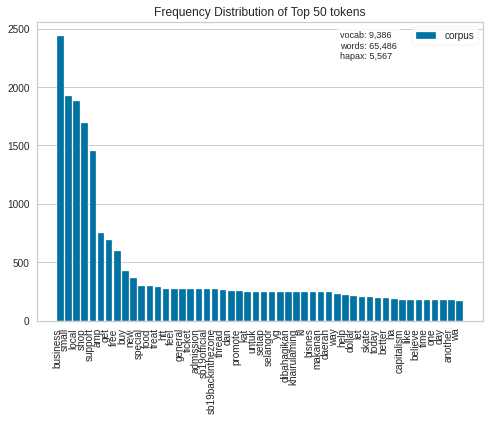

In [ ]:
# VISUALIZING THE TOP WORDS AGAIN

# Load the text data
vectorizer = CountVectorizer()
docs       = vectorizer.fit_transform(data['pre_process_new'])
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(docs)
visualizer.show()

# below are the top 50 words, we should remove the top few words from our corpus
# self|car|cars|oo|diving|http|driverless|future|vehicle|google|the

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
from nltk import word_tokenize, pos_tag, pos_tag_sents

texts = data['pre_process_new'].tolist()
tagged_texts = pos_tag_sents(map(word_tokenize, texts))
data['POS'] = tagged_texts

In [ ]:
data

,pre_process,id,pre_process_new,POS
0,rt khairulaming thread bisnes makanan untuk kl...,1399153632684036097,khairulaming thread bisnes makanan untuk kl da...,"[(khairulaming, VBG), (thread, JJ), (bisnes, N..."
1,craigtimes govrondesantis knowleshannah republ...,1399153617110663168,craigtimes govrondesantis knowleshannah republ...,"[(craigtimes, NNS), (govrondesantis, VBP), (kn..."
2,rt khairulaming thread bisnes makanan untuk kl...,1399153545400573957,khairulaming thread bisnes makanan untuk kl da...,"[(khairulaming, VBG), (thread, JJ), (bisnes, N..."
3,rt leftyaiman if full lock down is inevitable ...,1399153524064198657,leftyaiman full lock inevitable situation mana...,"[(leftyaiman, JJ), (full, JJ), (lock, NN), (in..."
4,lord you guy just got this ice cream from this...,1399153503512236035,lord guy got ice cream local ice cream shop so...,"[(lord, NN), (guy, NN), (got, VBD), (ice, JJ),..."
...,...,...,...,...
4355,rt samvanzweden shop local and you ll get 20 o...,1487918394212896774,samvanzweden shop local get 20 icymi 50 title ...,"[(samvanzweden, NN), (shop, NN), (local, JJ), ..."
4356,rt kendrasmills if m forced to participate in ...,1487918276202139654,kendrasmills forced participate capitalism bet...,"[(kendrasmills, NNS), (forced, VBD), (particip..."
4357,rt japritchard please don be harsh to the driv...,1487918256300204042,japritchard please harsh driver likely thinkin...,"[(japritchard, NN), (please, NN), (harsh, NN),..."
4358,jorgibear430 look like it belongs in my local ...,1487918165187301379,jorgibear430 look like belongs local kebab shop,"[(jorgibear430, JJ), (look, NN), (like, IN), (..."


In [ ]:
tagged_speech=[data['POS'].tolist()]

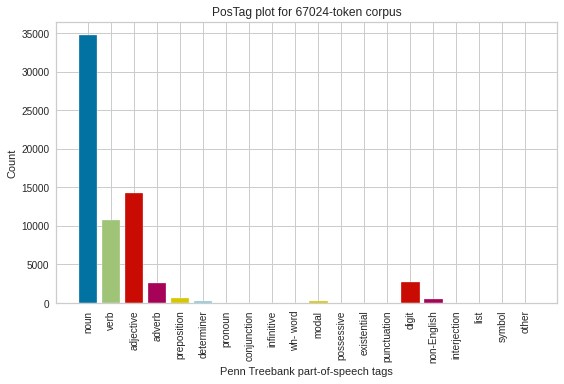

PosTagVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fe033af48d0>)

In [ ]:
from yellowbrick.text.postag import postag
postag(tagged_speech)

In [ ]:
data['pre_process_new']

0       khairulaming thread bisnes makanan untuk kl da...
1       craigtimes govrondesantis knowleshannah republ...
2       khairulaming thread bisnes makanan untuk kl da...
3       leftyaiman full lock inevitable situation mana...
4       lord guy got ice cream local ice cream shop so...
                              ...                        
4355    samvanzweden shop local get 20 icymi 50 title ...
4356    kendrasmills forced participate capitalism bet...
4357    japritchard please harsh driver likely thinkin...
4358      jorgibear430 look like belongs local kebab shop
4359    thekawaiiroar support small business today pro...
Name: pre_process_new, Length: 4360, dtype: object

In [ ]:
# import spacy
# from spacy import displacy

# nlp = spacy.load("en_core_web_sm")
# doc = nlp("This is a sentence.")

In [ ]:
# displacy.serve(doc, style="dep")
data.head()
df['id']

0       1399153632684036097
1       1399153617110663168
2       1399153545400573957
3       1399153524064198657
4       1399153503512236035
               ...         
4355    1487918394212896774
4356    1487918276202139654
4357    1487918256300204042
4358    1487918165187301379
4359    1487918058274443265
Name: id, Length: 4360, dtype: int64

In [ ]:
import spacy
import pandas as pd

df = data
nlp = spacy.load('en_core_web_sm')
loc_labels = ['GPE', 'LOC']
ner_locations = []

def get_NER_location(row):
    tweet_id = row['id']
    tweet = row['tweet']
    doc = nlp(tweet)
    for ent in doc.ents:
        if ent.label_ in loc_labels:
            ner_locations.append([tweet_id, ent.text, ent.label_, spacy.explain(ent.label_)])


df.apply(lambda row: get_NER_location(row))
ner_df = pd.DataFrame(ner_locations, columns=['id', 'ent', 'label', 'label_desc'])
merged_df = pd.merge(df, ner_df, on='id', how='outer')

KeyError: ignored